<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Laptop_pricing_revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [ ]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [32]:
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'], 2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [33]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
  print(missing_data[column].value_counts())
  print("")

Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



In [34]:
avg_weight = df['Weight_kg'].astype('float').mean(axis=0)
df['Weight_kg'] = df['Weight_kg'].replace(np.NaN, avg_weight)

In [35]:
comon_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

In [36]:
df['Screen_Size_cm'] = df['Screen_Size_cm'].replace(np.NaN, comon_screen_size)


In [37]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [38]:
df.dtypes

,0
Unnamed: 0,int64
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_cm,float64
CPU_frequency,float64
RAM_GB,int64


In [41]:
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df['Screen_Size_cm'].rename({'Screen_Size_cm':'Screen_Size_in'}, inplace=True)

df['Weight_kg'] = df['Weight_kg']*2.205
df['Weight_kg'].rename({'Weight_kg':'Weight_pounds'}, inplace=True)

In [48]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_in', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price'],
      dtype='object')

In [50]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [51]:
df['CPU_frequency']

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690
...,...
233,0.896552
234,0.827586
235,0.896552
236,0.862069


In [53]:
bins = np.linspace(min(df['Price']), max(df['Price']), num=4)
group_names = ['Low', 'Medium', 'High']
df['Price_binned'] = pd.cut(df['Price'], bins=bins, labels=group_names, include_lowest=True)

In [54]:
df['Price_binned'].value_counts()

,count
Price_binned,
Low,160
Medium,72
High,6


Text(0.5, 1.0, 'Prcie bins')

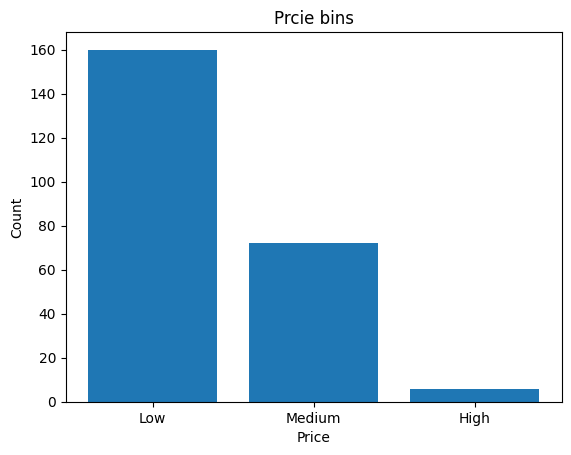

In [55]:
plt.bar(group_names, df['Price_binned'].value_counts())
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Prcie bins')

In [56]:
df['Screen'].value_counts()

,count
Screen,
Full HD,161
IPS Panel,77


In [57]:
dummy_variable_1 = pd.get_dummies(df['Screen'], dtype=int)
dummy_variable_1

,Full HD,IPS Panel
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
233,0,1
234,1,0
235,0,1
236,1,0


In [63]:
dummy_variable_1.rename(columns={'Full HD':'Screen-Full_HD', 'IPS Panel':'Screen-IPS_panel'}, inplace=True)
dummy_variable_1

,Screen-Full_HD,Screen-IPS_panel
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
233,0,1
234,1,0
235,0,1
236,1,0


In [69]:
df = pd.concat([df, dummy_variable_1], axis=1)


In [70]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_in,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,IPS Panel,2,1,5,5.511811,0.551724,8,256,7.779240,978,Low,0,1
1,1,Dell,3,Full HD,1,1,3,6.141112,0.689655,4,256,10.696455,634,Low,1,0
2,2,Dell,3,Full HD,1,1,7,6.141112,0.931034,8,256,10.696455,946,Low,1,0
3,3,Dell,4,IPS Panel,2,1,5,5.235910,0.551724,8,128,5.931671,1244,Low,0,1
4,4,HP,4,Full HD,2,1,7,6.141112,0.620690,8,256,9.286468,837,Low,1,0


In [71]:
df.drop("Screen", axis = 1, inplace=True)

In [72]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_in,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,5.511811,0.551724,8,256,7.779240,978,Low,0,1
1,1,Dell,3,1,1,3,6.141112,0.689655,4,256,10.696455,634,Low,1,0
2,2,Dell,3,1,1,7,6.141112,0.931034,8,256,10.696455,946,Low,1,0
3,3,Dell,4,2,1,5,5.235910,0.551724,8,128,5.931671,1244,Low,0,1
4,4,HP,4,2,1,7,6.141112,0.620690,8,256,9.286468,837,Low,1,0
